In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
%matplotlib inline

## Feature columns(数据特征的确定)

In [2]:
# all feature colmuns 
column_names = ['age','class_worker', 'det_ind_code', 'det_occ_code', 'education', 'wage_per_hour', 'hs_college',
                    'marital_stat', 'major_ind_code', 'major_occ_code', 'race', 'hisp_origin', 'sex', 'union_member',
                    'unemp_reason', 'full_or_part_emp', 'capital_gains', 'capital_losses', 'stock_dividends',
                    'tax_filer_stat', 'region_prev_res', 'state_prev_res', 'det_hh_fam_stat', 'det_hh_summ',
                    'instance_weight', 'mig_chg_msa', 'mig_chg_reg', 'mig_move_reg', 'mig_same', 'mig_prev_sunbelt',
                    'num_emp', 'fam_under_18', 'country_father', 'country_mother', 'country_self', 'citizenship',
                    'own_or_self', 'vet_question', 'vet_benefits', 'weeks_worked', 'year', 'income_50k']

In [3]:
# categorical features
categorical_columns = ['class_worker', 'det_ind_code', 'det_occ_code', 'education', 'hs_college', 'major_ind_code',
                           'major_occ_code', 'race', 'hisp_origin', 'sex', 'union_member', 'unemp_reason',
                           'full_or_part_emp', 'tax_filer_stat', 'region_prev_res', 'state_prev_res', 'det_hh_fam_stat',
                           'det_hh_summ', 'mig_chg_msa', 'mig_chg_reg', 'mig_move_reg', 'mig_same', 'mig_prev_sunbelt',
                           'fam_under_18', 'country_father', 'country_mother', 'country_self', 'citizenship',
                           'vet_question']

In [4]:
# label
label_columns=['income_50k', 'marital_stat']

In [6]:
# numerical features
numeric_cols = list(set(column_names) - set(categorical_columns) - set(label_columns))

In [18]:
numeric_cols

['own_or_self',
 'age',
 'num_emp',
 'stock_dividends',
 'year',
 'capital_losses',
 'vet_benefits',
 'instance_weight',
 'weeks_worked',
 'capital_gains',
 'wage_per_hour']

In [10]:
train_path = '../data/census/census-income.data.gz'
test_path = '../data/census/census-income.test.gz'

In [11]:
train_df = pd.read_csv(
        train_path,
        delimiter=',',
        header=None,
        index_col=None,
        names=column_names
    )

In [12]:
train_df.head()

,age,class_worker,det_ind_code,det_occ_code,education,wage_per_hour,hs_college,marital_stat,major_ind_code,major_occ_code,...,country_father,country_mother,country_self,citizenship,own_or_self,vet_question,vet_benefits,weeks_worked,year,income_50k
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


## Continuous Data

We use the **age** feature to explain how to do feature enginnering of continuous data 

In [26]:
train_df.age.value_counts()

34    3489
35    3450
36    3353
31    3351
33    3340
      ... 
85     423
86     348
87     301
88     241
89     195
Name: age, Length: 91, dtype: int64

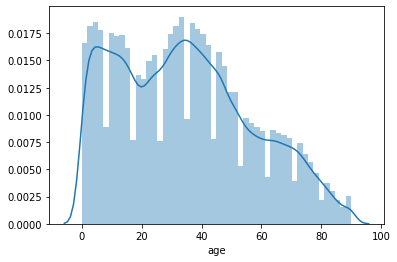

In [28]:
# the origin distribution of age
sns.distplot(train_df.age)

* ### Min_Max Standardisation

In [29]:
age_min_max = (train_df.age - train_df.age.min())/(train_df.age.max()-train_df.age.min())

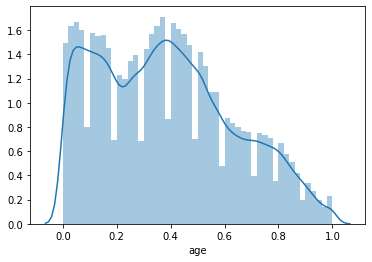

In [30]:
sns.distplot(age_min_max)

* ### Log transformation

Because the 0 in data, we recommend log(x+1) to avoid outlier

In [33]:
age_log = np.log(train_df.age.values+1)

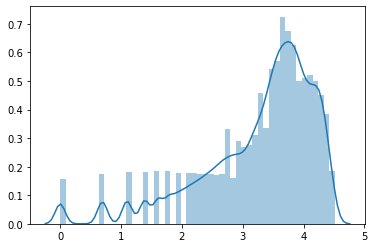

In [34]:
sns.distplot(age_log)

* ### Zscore transformation

In [35]:
age_zscore = (train_df.age.values-train_df.age.mean())/train_df.age.std()

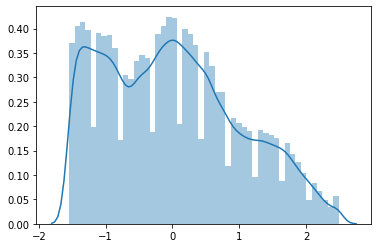

In [36]:
sns.distplot(age_zscore)

* ### BoxCox transformation

In [89]:
from scipy.stats import boxcox

In [90]:
age_boxcox = boxcox(train_df.age.values+1)

In [91]:
age_boxcox

(array([18.6619857 , 16.18767457,  7.64792496, ..., 14.1958599 ,
         7.07006979, 11.12707699]), 0.5703336304445545)

 $\lambda$ =0.57

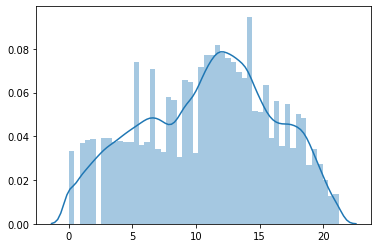

In [92]:
sns.distplot(age_boxcox[0])